In [38]:
!pip install scikit-plot

###**Importing Libraries**

In [55]:
import pandas as pd
import numpy as np
import scikitplot as skplt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.model_selection import GridSearchCV
import numpy as np
warnings.filterwarnings('ignore')

###**Import your dataset**

In [56]:
#reading the .xlsx dataset in to the dataframe
df = pd.read_csv("AIDA-PHQ-Updated.csv")

In [57]:
df.head(7)

,Age,Gender,CGPA,PoorAcademicPerformanceSelfPerception,AcademicCriticismSelfPerception,UnsatisfiedAcademicWorkloadSelfPerception,NonInterestSubjectOpinion,UnhappySubjectOpinion,NonInterestInstitutionOpinion,UnhappyInstitutionOpinion,...,little interest,feeling down,Sleeping issue,feeling tired,poor appetite,feeling bad,trouble concertrating,slowness,self harm,DepressionLevel
0,23,Female,3.38,Disagree,Disagree,Neutral,Strongly disagree,Strongly disagree,Disagree,Strongly disagree,...,0,1,1,0,0,1,0,1,0,Minimal
1,24,Female,3.08,Disagree,Disagree,Agree,Disagree,Disagree,Disagree,Disagree,...,1,0,1,0,1,1,0,0,0,Minimal
2,24,Male,3.05,Neutral,Neutral,Agree,Agree,Neutral,Neutral,Disagree,...,0,1,0,0,0,0,0,1,0,Minimal
3,22,Male,3.82,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Disagree,Agree,...,0,1,0,1,0,1,0,0,1,Minimal
4,25,Male,3.40,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,...,1,1,1,0,2,0,1,3,1,Moderate
5,23,Female,3.04,Neutral,Neutral,Neutral,Agree,Agree,Agree,Agree,...,1,1,0,0,1,1,1,0,0,Mild
6,22,Male,2.85,Strongly agree,Strongly agree,Strongly agree,Agree,Neutral,Strongly agree,Agree,...,1,2,1,2,1,2,1,3,2,ModeratelySevere


In [58]:
df.columns.tolist()

['Age',
 'Gender',
 'CGPA',
 'PoorAcademicPerformanceSelfPerception',
 'AcademicCriticismSelfPerception',
 'UnsatisfiedAcademicWorkloadSelfPerception',
 'NonInterestSubjectOpinion',
 'UnhappySubjectOpinion',
 'NonInterestInstitutionOpinion',
 'UnhappyInstitutionOpinion',
 'ParentalStrictness',
 'ParentalAcademicPressure',
 'ParentalMarriagePressure',
 'ParentalCareerPressure',
 'ParentalStudyAbroadPressure',
 'ParentalUnderstanding',
 'SiblingBonding',
 'ParentalRelationshipStability',
 'PeerRelationship',
 'TeacherSupport',
 'PartnerRelationshipImpact',
 'PhysicalViolenceExperience',
 'SexualViolenceExperience',
 'VerbalViolenceExperience',
 'EmotionalViolenceExperience',
 'little interest',
 'feeling down',
 'Sleeping issue',
 'feeling tired',
 'poor appetite',
 'feeling bad',
 'trouble concertrating',
 'slowness',
 'self harm',
 'DepressionLevel']

###**Data fruther preprossesing**

In [59]:
import pandas as pd

# Assume df is already loaded into the dfFrame named `df`

# Ordinal mappings
ordinal_mappings = {
    'Not Applicable' : 0,
    'Strongly disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly agree': 5
}

# Applying ordinal mappings
ordinal_columns = [
    'PoorAcademicPerformanceSelfPerception',
 'AcademicCriticismSelfPerception',
 'UnsatisfiedAcademicWorkloadSelfPerception',
 'NonInterestSubjectOpinion',
 'UnhappySubjectOpinion',
 'NonInterestInstitutionOpinion',
 'UnhappyInstitutionOpinion',
 'ParentalStrictness',
 'ParentalAcademicPressure',
 'ParentalMarriagePressure',
 'ParentalCareerPressure',
 'ParentalStudyAbroadPressure',
  'ParentalUnderstanding',
 'SiblingBonding',
 'ParentalRelationshipStability',
 'PeerRelationship',
 'TeacherSupport',
 'PartnerRelationshipImpact','PhysicalViolenceExperience', 'SexualViolenceExperience', 'VerbalViolenceExperience', 'EmotionalViolenceExperience'
]

for col in ordinal_columns:
    df[col] = df[col].map(ordinal_mappings)

# # Handling nominal df with one-hot encoding
# nominal_columns = ['Gender']  # Add other nominal columns if needed
# df = pd.get_dummies(df, columns=nominal_columns)

# Encode the Gender column

encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

# Assuming some fields are binary or already numerically coded
# No changes required for 'Age', 'CGPA', and binary columns like 'feeling down', 'little interest', etc.

# Check for any missing values and fill them (example uses median filling for simplicity)
for col in ordinal_columns:
    if df[col].isna().any():
        df[col].fillna(df[col].median(), inplace=True)


# depression_mapping = {
#     'Minimal': 0,
#     'Moderate': 1,
#     'Mild': 2,
#     'ModeratelySevere': 3,
#     'Severe': 4
# }
# df['DepressionLevel'] = df['DepressionLevel'].map(depression_mapping)



In [60]:
df.head()

,Age,Gender,CGPA,PoorAcademicPerformanceSelfPerception,AcademicCriticismSelfPerception,UnsatisfiedAcademicWorkloadSelfPerception,NonInterestSubjectOpinion,UnhappySubjectOpinion,NonInterestInstitutionOpinion,UnhappyInstitutionOpinion,...,little interest,feeling down,Sleeping issue,feeling tired,poor appetite,feeling bad,trouble concertrating,slowness,self harm,DepressionLevel
0,23,0,3.38,2,2,3,1,1,2,1,...,0,1,1,0,0,1,0,1,0,Minimal
1,24,0,3.08,2,2,4,2,2,2,2,...,1,0,1,0,1,1,0,0,0,Minimal
2,24,1,3.05,3,3,4,4,3,3,2,...,0,1,0,0,0,0,0,1,0,Minimal
3,22,1,3.82,1,1,1,1,1,2,4,...,0,1,0,1,0,1,0,0,1,Minimal
4,25,1,3.40,2,2,2,2,2,2,2,...,1,1,1,0,2,0,1,3,1,Moderate


###**Feature Engineering**

In [61]:
# Assign features (X) and target variable (y) || y = f(x)
X = df[['CGPA','Age','Gender','little interest','feeling down','Sleeping issue','feeling tired','poor appetite','feeling bad','trouble concertrating','slowness','self harm',
'PoorAcademicPerformanceSelfPerception',
 'AcademicCriticismSelfPerception',
 'UnsatisfiedAcademicWorkloadSelfPerception',
 'NonInterestSubjectOpinion',
 'UnhappySubjectOpinion',
 'NonInterestInstitutionOpinion',
 'UnhappyInstitutionOpinion']]  # Features (all columns except 'Target column')
y = df['DepressionLevel']  # Target variable ('Target' column)

In [62]:
X.head()

,CGPA,Age,Gender,little interest,feeling down,Sleeping issue,feeling tired,poor appetite,feeling bad,trouble concertrating,slowness,self harm,PoorAcademicPerformanceSelfPerception,AcademicCriticismSelfPerception,UnsatisfiedAcademicWorkloadSelfPerception,NonInterestSubjectOpinion,UnhappySubjectOpinion,NonInterestInstitutionOpinion,UnhappyInstitutionOpinion
0,3.38,23,0,0,1,1,0,0,1,0,1,0,2,2,3,1,1,2,1
1,3.08,24,0,1,0,1,0,1,1,0,0,0,2,2,4,2,2,2,2
2,3.05,24,1,0,1,0,0,0,0,0,1,0,3,3,4,4,3,3,2
3,3.82,22,1,0,1,0,1,0,1,0,0,1,1,1,1,1,1,2,4
4,3.40,25,1,1,1,1,0,2,0,1,3,1,2,2,2,2,2,2,2


###**Train Test Split** (No Need to change anthing from here)

In [47]:
# #Results of Grid Search -

# KNN: Best parameters - {'metric': 'manhattan', 'n_neighbors': 1}, Best score - 0.6803212851405622
# Decision Tree: Best parameters - {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 5}, Best score - 0.7091508892713713
# Random Forest: Best parameters - {'criterion': 'entropy', 'max_depth': 19, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}, Best score - 0.8174125071715433
# Logistic Regression: Best parameters - {'C': 100.0, 'solver': 'lbfgs'}, Best score - 0.9230636833046472
# Naive Bayes: Best parameters - {}, Best score - 0.7234939759036145
# SVM: Best parameters - {'C': 10.0, 'degree': 2, 'gamma': 0.01, 'kernel': 'linear'}, Best score - 0.9374067699368904
# AdaBoost: Best parameters - {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 200}, Best score - 0.5601549053356283
# Gradient Boosting: Best parameters - {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}, Best score - 0.7909351692484222

In [83]:
# Initialize random state
initial_random_state = 2024


In [84]:
# Defining classifiers in the dictionary with best parameters from previous grid search
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=1, metric='manhattan'),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4, min_samples_split=5),
    'Random Forest': RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=19, max_features='log2', min_samples_leaf=1, min_samples_split=2),
    'Logistic Regression': LogisticRegression(C=100.0, solver='lbfgs'),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(C=10.0, degree=2, gamma=0.01, kernel='linear', probability=True),
    'AdaBoost': AdaBoostClassifier(n_estimators=200, learning_rate=1, algorithm='SAMME'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=1, min_samples_leaf=2, min_samples_split=2, loss='log_loss')
}


# Store evaluation metrics
evaluation_metrics = {name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} for name in classifiers.keys()}

In [85]:
# Loop to change random state and evaluate models
for i in range(5):
    random_state = initial_random_state + i
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Evaluate each classifier
    for classifier_name, classifier in classifiers.items():
        # Train the classifier
        classifier.fit(X_train, y_train)

        # Predict using the trained classifier
        y_pred = classifier.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Store evaluation metrics
        evaluation_metrics[classifier_name]['accuracy'].append(accuracy)
        evaluation_metrics[classifier_name]['precision'].append(precision)
        evaluation_metrics[classifier_name]['recall'].append(recall)
        evaluation_metrics[classifier_name]['f1'].append(f1)

# Calculate and print mean and uncertainty (standard deviation)
for name, metrics in evaluation_metrics.items():
    mean_accuracy = np.mean(metrics['accuracy'])
    std_accuracy = np.std(metrics['accuracy'])
    mean_precision = np.mean(metrics['precision'])
    std_precision = np.std(metrics['precision'])
    mean_recall = np.mean(metrics['recall'])
    std_recall = np.std(metrics['recall'])
    mean_f1 = np.mean(metrics['f1'])
    std_f1 = np.std(metrics['f1'])

    print(f"-------------{name}:-------------")
    print(f"Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"Precision: {mean_precision:.4f} ± {std_precision:.4f}")
    print(f"Recall: {mean_recall:.4f} ± {std_recall:.4f}")
    print(f"F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
    print()

-------------KNN:-------------
Accuracy: 0.7058 ± 0.0406
Precision: 0.7133 ± 0.0226
Recall: 0.7020 ± 0.0156
F1 Score: 0.6961 ± 0.0108

-------------Decision Tree:-------------
Accuracy: 0.7096 ± 0.0205
Precision: 0.7333 ± 0.0308
Recall: 0.6737 ± 0.0265
F1 Score: 0.6914 ± 0.0237

-------------Random Forest:-------------
Accuracy: 0.7923 ± 0.0415
Precision: 0.8306 ± 0.0267
Recall: 0.7604 ± 0.0279
F1 Score: 0.7803 ± 0.0311

-------------Logistic Regression:-------------
Accuracy: 0.9365 ± 0.0144
Precision: 0.8997 ± 0.0222
Recall: 0.9193 ± 0.0112
F1 Score: 0.9035 ± 0.0092

-------------Naive Bayes:-------------
Accuracy: 0.7750 ± 0.0248
Precision: 0.7860 ± 0.0271
Recall: 0.7331 ± 0.0106
F1 Score: 0.7470 ± 0.0141

-------------SVM:-------------
Accuracy: 0.9577 ± 0.0047
Precision: 0.9208 ± 0.0155
Recall: 0.9351 ± 0.0191
F1 Score: 0.9242 ± 0.0140

-------------AdaBoost:-------------
Accuracy: 0.5635 ± 0.0232
Precision: 0.3292 ± 0.0136
Recall: 0.4652 ± 0.0158
F1 Score: 0.3811 ± 0.0126

------

In [91]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('svc', SVC(C=10.0, degree=2, gamma=0.01, kernel='linear', probability=True)),
    ('rf', RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=19, max_features='log2', min_samples_leaf=1, min_samples_split=2)),
    ('nb', GaussianNB())
]

# Define the meta-model
meta_model = LogisticRegression(C=100.0, solver='lbfgs')

# Store evaluation metrics, use 'evaluation_metrics' instead of 'evaluation'
evaluation_metrics['Stacking'] = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Split the dataset into training and testing sets

for i in range(5):
    random_state = initial_random_state + i
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Create the stacking classifier
    stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

    # Train the stacking classifier
    stacking_clf.fit(X_train, y_train)

    # Make predictions and evaluate the model
    y_pred = stacking_clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')


    # Store evaluation metrics, use 'Stacking' as the classifier name since it's a new model
    evaluation_metrics['Stacking']['accuracy'].append(accuracy)
    evaluation_metrics['Stacking']['precision'].append(precision)
    evaluation_metrics['Stacking']['recall'].append(recall)
    evaluation_metrics['Stacking']['f1'].append(f1)




# Calculate and print mean and uncertainty (standard deviation)
for name, metrics in evaluation_metrics.items(): # Use 'evaluation_metrics'
    mean_accuracy = np.mean(metrics['accuracy'])
    std_accuracy = np.std(metrics['accuracy'])
    mean_precision = np.mean(metrics['precision'])
    std_precision = np.std(metrics['precision'])
    mean_recall = np.mean(metrics['recall'])
    std_recall = np.std(metrics['recall'])
    mean_f1 = np.mean(metrics['f1'])
    std_f1 = np.std(metrics['f1'])

    print(f"-------------{name}:-------------")
    print(f"Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"Precision: {mean_precision:.4f} ± {std_precision:.4f}")
    print(f"Recall: {mean_recall:.4f} ± {std_recall:.4f}")
    print(f"F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
    print()
    #note: cell reapted 2 times after execution

-------------KNN:-------------
Accuracy: 0.7058 ± 0.0406
Precision: 0.7133 ± 0.0226
Recall: 0.7020 ± 0.0156
F1 Score: 0.6961 ± 0.0108

-------------Decision Tree:-------------
Accuracy: 0.7096 ± 0.0205
Precision: 0.7333 ± 0.0308
Recall: 0.6737 ± 0.0265
F1 Score: 0.6914 ± 0.0237

-------------Random Forest:-------------
Accuracy: 0.7923 ± 0.0415
Precision: 0.8306 ± 0.0267
Recall: 0.7604 ± 0.0279
F1 Score: 0.7803 ± 0.0311

-------------Logistic Regression:-------------
Accuracy: 0.9365 ± 0.0144
Precision: 0.8997 ± 0.0222
Recall: 0.9193 ± 0.0112
F1 Score: 0.9035 ± 0.0092

-------------Naive Bayes:-------------
Accuracy: 0.7750 ± 0.0248
Precision: 0.7860 ± 0.0271
Recall: 0.7331 ± 0.0106
F1 Score: 0.7470 ± 0.0141

-------------SVM:-------------
Accuracy: 0.9577 ± 0.0047
Precision: 0.9208 ± 0.0155
Recall: 0.9351 ± 0.0191
F1 Score: 0.9242 ± 0.0140

-------------AdaBoost:-------------
Accuracy: 0.5635 ± 0.0232
Precision: 0.3292 ± 0.0136
Recall: 0.4652 ± 0.0158
F1 Score: 0.3811 ± 0.0126

------

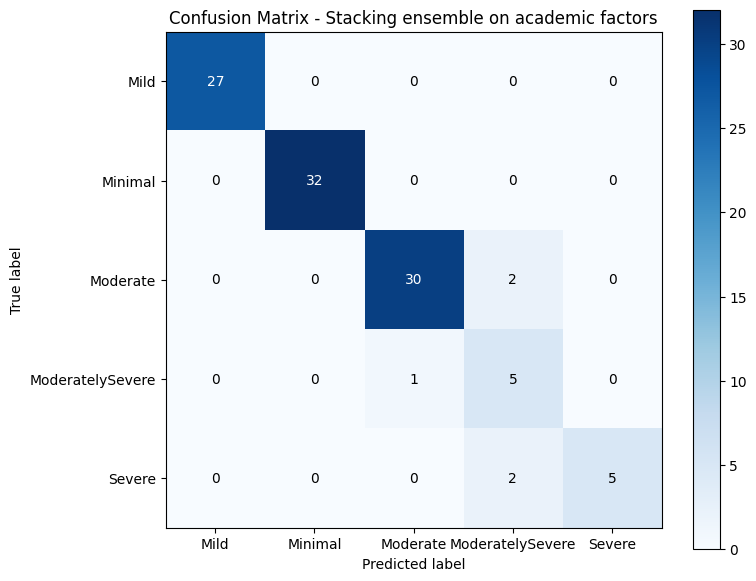

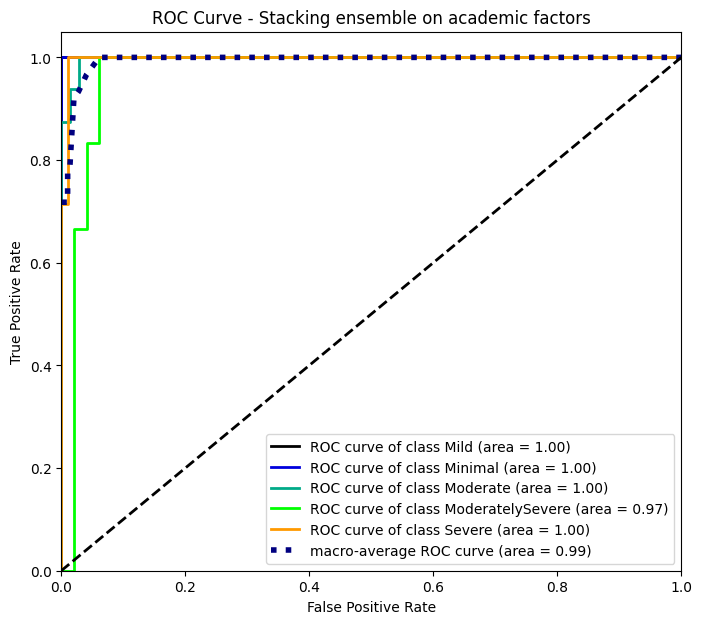

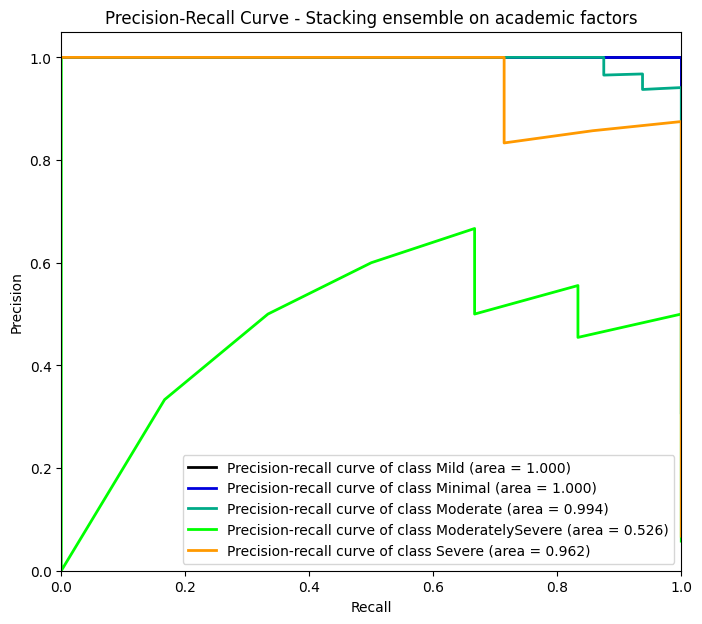

In [92]:
    # Plot confusion matrix with classifier name
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(8,7), title=f"Confusion Matrix - {name} ensemble on academic factors");

    # Plot ROC curve with classifier name
    y_probas = stacking_clf.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_probas, figsize=(8,7), plot_micro=False, plot_macro=True, title=f"ROC Curve - {name} ensemble on academic factors");

    # Plot PRC curve with classifier name
    skplt.metrics.plot_precision_recall(y_test, y_probas, figsize=(8,7), plot_micro=False, title=f"Precision-Recall Curve - {name} ensemble on academic factors");

In [93]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Define the XGBoost classifier
xgb_clf = XGBClassifier(learning_rate=0.1, max_depth=10, n_estimators=200)

# Store evaluation metrics
evaluation_metrics['XGBoost'] = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Split the dataset into training and testing sets
for i in range(5):
    random_state = initial_random_state + i
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Encode the target variable to numerical labels
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # Train the XGBoost classifier
    xgb_clf.fit(X_train, y_train)

    # Make predictions and evaluate the model
    y_pred = xgb_clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store evaluation metrics
    evaluation_metrics['XGBoost']['accuracy'].append(accuracy)
    evaluation_metrics['XGBoost']['precision'].append(precision)
    evaluation_metrics['XGBoost']['recall'].append(recall)
    evaluation_metrics['XGBoost']['f1'].append(f1)

# Calculate and print mean and uncertainty (standard deviation)
for name, metrics in evaluation_metrics.items():
    mean_accuracy = np.mean(metrics['accuracy'])
    std_accuracy = np.std(metrics['accuracy'])
    mean_precision = np.mean(metrics['precision'])
    std_precision = np.std(metrics['precision'])
    mean_recall = np.mean(metrics['recall'])
    std_recall = np.std(metrics['recall'])
    mean_f1 = np.mean(metrics['f1'])
    std_f1 = np.std(metrics['f1'])

    print(f"-------------{name}:-------------")
    print(f"Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"Precision: {mean_precision:.4f} ± {std_precision:.4f}")
    print(f"Recall: {mean_recall:.4f} ± {std_recall:.4f}")
    print(f"F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
    print()

-------------KNN:-------------
Accuracy: 0.7058 ± 0.0406
Precision: 0.7133 ± 0.0226
Recall: 0.7020 ± 0.0156
F1 Score: 0.6961 ± 0.0108

-------------Decision Tree:-------------
Accuracy: 0.7096 ± 0.0205
Precision: 0.7333 ± 0.0308
Recall: 0.6737 ± 0.0265
F1 Score: 0.6914 ± 0.0237

-------------Random Forest:-------------
Accuracy: 0.7923 ± 0.0415
Precision: 0.8306 ± 0.0267
Recall: 0.7604 ± 0.0279
F1 Score: 0.7803 ± 0.0311

-------------Logistic Regression:-------------
Accuracy: 0.9365 ± 0.0144
Precision: 0.8997 ± 0.0222
Recall: 0.9193 ± 0.0112
F1 Score: 0.9035 ± 0.0092

-------------Naive Bayes:-------------
Accuracy: 0.7750 ± 0.0248
Precision: 0.7860 ± 0.0271
Recall: 0.7331 ± 0.0106
F1 Score: 0.7470 ± 0.0141

-------------SVM:-------------
Accuracy: 0.9577 ± 0.0047
Precision: 0.9208 ± 0.0155
Recall: 0.9351 ± 0.0191
F1 Score: 0.9242 ± 0.0140

-------------AdaBoost:-------------
Accuracy: 0.5635 ± 0.0232
Precision: 0.3292 ± 0.0136
Recall: 0.4652 ± 0.0158
F1 Score: 0.3811 ± 0.0126

------

In [54]:
# # NO HPT accuracies -


# -------------KNN:-------------
# Accuracy: 0.71 ± 0.03
# -------------Decision Tree:-------------
# Accuracy: 0.69 ± 0.03
# -------------Random Forest:-------------
# Accuracy: 0.81 ± 0.05
# -------------Logistic Regression:-------------
# Accuracy: 0.91 ± 0.03
# -------------Naive Bayes:-------------
# Accuracy: 0.78 ± 0.02
# -------------SVM:-------------
# Accuracy: 0.88 ± 0.03
# -------------AdaBoost:-------------
# Accuracy: 0.53 ± 0.05
# -------------Gradient Boosting:-------------
# Accuracy: 0.80 ± 0.05
